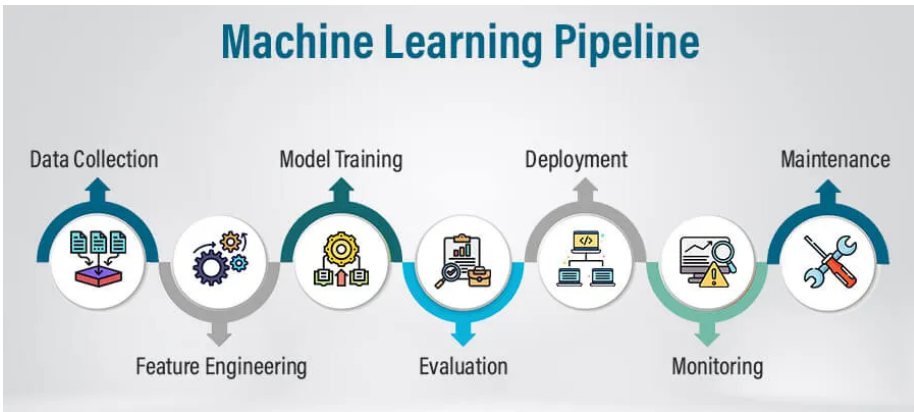

**Machine Learning Pipeline** : is  a sequence of steps that automates complete machine learning work flow from data collection to prediction


In [ ]:
#import all required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset={
    'Study Hours':[1,2,3,4,np.nan,6,7,8,9,10],
    'Attendance':[50,55,np.nan,60,65,70,np.nan,80,85,90],
    'Score':[35,40,45,50,55,60,70,80,90,100]
}

In [ ]:
df=pd.DataFrame(dataset)

In [ ]:
df

,Study Hours,Attendance,Score
0,1.0,50.0,35
1,2.0,55.0,40
2,3.0,NaN,45
3,4.0,60.0,50
4,NaN,65.0,55
5,6.0,70.0,60
6,7.0,NaN,70
7,8.0,80.0,80
8,9.0,85.0,90
9,10.0,90.0,100


In [ ]:
X=df.drop('Score',axis=1)
y=df['Score']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print('Training Data')
print(X_train.shape)
print(y_train.shape)
print('Testing Data')
print(X_test.shape)
print(y_test.shape)

Training Data
(8, 2)
(8,)
Testing Data
(2, 2)
(2,)


In [ ]:
pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])

In [ ]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
#Training
pipeline.fit(X_train,y_train)
#

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
#prediction
y_pred=pipeline.predict(X_test)
print('Actual Values: ',y_test.values)
print('Predicted Values: ',y_pred)

Actual Values:  [90 40]
Predicted Values:  [87.3459555  36.37333245]


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


In [ ]:
print('Mean Absolute Error: ',mae)
print('Mean Squared Error: ',mse)
print('Root Mean Squared Error: ',rmse)

Mean Absolute Error:  3.1403560239407966
Mean Squared Error:  10.098334853873428
Root Mean Squared Error:  3.1777877295177266


In [ ]:
#predict a new record
study_hours=float(input('Enter the number of study hours: '))
attendance=float(input('Enter the attendance percentage: '))
new_data=pd.DataFrame({'Study Hours':[study_hours],'Attendance':[attendance]})
prediction=pipeline.predict(new_data)
print('Predicted Score: ',round(prediction[0],2))


Enter the number of study hours: 8
Enter the attendance percentage: 90
Predicted Score:  84.18


### Use student_performance.csv and Create a pipeline to predict sudent's final score
* you can download from gitHub : https://github.com/salman1256/aiml_evening/tree/master/Day-24
* Features are: study_hours	attendance_percentage	previous_exam_score
* Target : final_exam_score
* Create a pipeline to predict student's final score
* Evaluate
* predict for new student using pipeline

In [61]:
df=pd.read_csv('/content/sample_data/student_performance.csv')

In [62]:
df.head()

,study_hours,attendance_percentage,previous_exam_score,final_exam_score
0,7,77,58,87
1,4,51,87,83
2,8,91,55,101
3,5,94,42,74
4,7,55,59,87


In [63]:
X=X=df.drop('final_exam_score',axis=1)
y=df['final_exam_score']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print('Training Data')
print(X_train.shape)
print(y_train.shape)
print('Testing Data')
print(X_test.shape)
print(y_test.shape)

Training Data
(96, 3)
(96,)
Testing Data
(24, 3)
(24,)


In [65]:
pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])

In [66]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [67]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [68]:
y_pred=pipeline.predict(X_test)
print('Actual Values: ',y_test.values)
print('Predicted Values: ',y_pred)

Actual Values:  [ 93  67  87  78  80  65  96  88  81 112  61  86  91  71  65  90  86  87
  88  69  95  86  87  97]
Predicted Values:  [ 99.3470484   74.94031454  81.93646701  85.40501845  73.48589537
  67.626957    96.91152912  87.38160671  77.40737339 106.97002269
  66.55701052  85.83518004  96.06575288  72.76247995  69.13006728
  96.4392374   88.03016617  87.32951574  86.14598304  70.9930693
  94.90340129  77.96052551  90.73538567 100.49185082]


In [69]:
print('Mean Absolute Error',mean_squared_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error 20.54950420851446
Mean Squared Error 20.54950420851446
Root Mean Squared Error 4.5331560979646905


In [70]:
# study_hours attendance_percentage previous_exam_score
study_hours=float(input('Enter the number of study hours: '))
attendance=float(input('Enter the attendance percentage: '))
previous_exam_score=float(input('Enter the previous exam score: '))
new_data=pd.DataFrame({'study_hours':[study_hours],'attendance_percentage':[attendance],'previous_exam_score':[previous_exam_score]})
prediction=pipeline.predict(new_data)
print('Predicted Score: ',round(prediction[0],2))


Enter the number of study hours: 7
Enter the attendance percentage: 79
Enter the previous exam score: 59
Predicted Score:  88.36
